<a href="https://colab.research.google.com/github/kapilkukreja469/Mobile_price_range_prediction/blob/main/Mobile_price_range_prediction_by_kapil_kukreja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Mobile Price Range Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Submitted By**            - Kapil Kukreja

# **Project Summary -**

Now a days, a cellphone is an essential accessory of a person. It is the fastest evolving and moving product in the technology market space. New mobiles with updated versions and new features are introduced into the market at a rapid pace. Thousands of mobiles are sold each day. In such a fast-paced and volatile market, a mobile company needs to set optimal prices to complete with its rivals. This kind of prediction will help companies estimate price of mobiles to give tough competition to other mobile manufacturer. Also it will be useful for Consumers to verify that they are paying best price for a mobile.

This project aimed to predict the price range of mobile phones using various features and machine learning techniques.In this project we have done the following:


*   Analyzing the data for Null and Duplicate values and tackling them using different techniques.
* Exploratory Data Analysis (EDA).
* Hypothesis Testing between Categorical and Numerical variables.
* Handling Outliers.
* Feature selection and Feature Manipulation.
* Data transformation.
* Scaling the data using MinMaxScaler.
* Splitting the data.
* ML model implementation with Cross- Validation & Hyperparameter Tuning.


# **GitHub Link -**

https://github.com/kapilkukreja469/Mobile_price_range_prediction/blob/main/Mobile_price_range_prediction_by_kapil_kukreja.ipynb

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price.In this problem, we do not have to predict the actual price but a price range indicating how high the price.**

**In this Project,On the basis of the mobile Specification like Battery power, 4G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np                             # importing numpy library for working with arrays
import pandas as pd                            # importing pandas library for working with data sets
import matplotlib.pyplot as plt                # importing matplotlib library for creating static, animated, and interactive visualizations
import seaborn as sns                          # importing seaborn library for creating statistical graphics in Python
from scipy.stats import chi2_contingency       # importing library for chi-square test
from scipy import stats                        # importing library for T-test and Anova test
from sklearn.model_selection import train_test_split        # importing train_test_split to splitting dataset for traning and testing
from sklearn.linear_model import LogisticRegression         # importing LogisticRegression for ML modeling
from sklearn.metrics import confusion_matrix                # importing confusion_matrix to evaluate the accuracy of a classification.
from sklearn.model_selection import GridSearchCV            # importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import cross_val_score         # importing cross_val_score to perform cross-validation
from xgboost import XGBClassifier	                    	    # importing XGBClassifier for applying XGBoost
from sklearn.metrics import classification_report           # importing classification_report  to generate a summary report of classification model
from sklearn.metrics import accuracy_score                  # importing accuracy_score  to calculate the accuracy of a classification model's predictions
from sklearn.tree import DecisionTreeClassifier             # importing DecisionTreeClassifier for classification tasks.
from sklearn.ensemble import RandomForestClassifier         # importing RandomForestClassifier for ML modeling

import warnings                                             # importing warnings to sets a filter to ignore all warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive      # Mounting google drive to load csv data files stored in google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Creating dataframe for storing csv file
# using try except exception handling in case if file not found
try:
  mobile_df = pd.read_csv("/content/drive/MyDrive/almabetter/Mobile price range prediction/data_mobile_price_range.csv")
except FileNotFoundError:
  print('Please provide correct file path for csv data')


### Dataset First View

In [ ]:
# Dataset First Look
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
mobile_df.shape
print(f"Total {mobile_df.shape[0]} Rows in dataframe")
print(f"Total {mobile_df.shape[1]} Columns in dataframe")

Total 2000 Rows in dataframe
Total 21 Columns in dataframe


### Dataset Information

In [ ]:
# Dataset Info
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
 #duplicated() method used to find duplicate rows in table based on store and date column
print(f"No. of duplicate rows in rossmann dataset: {len(mobile_df[mobile_df.duplicated()])}")

No. of duplicate rows in rossmann dataset: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
mobile_df.isnull().sum()                 #isnull() method used to check null values in columns

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

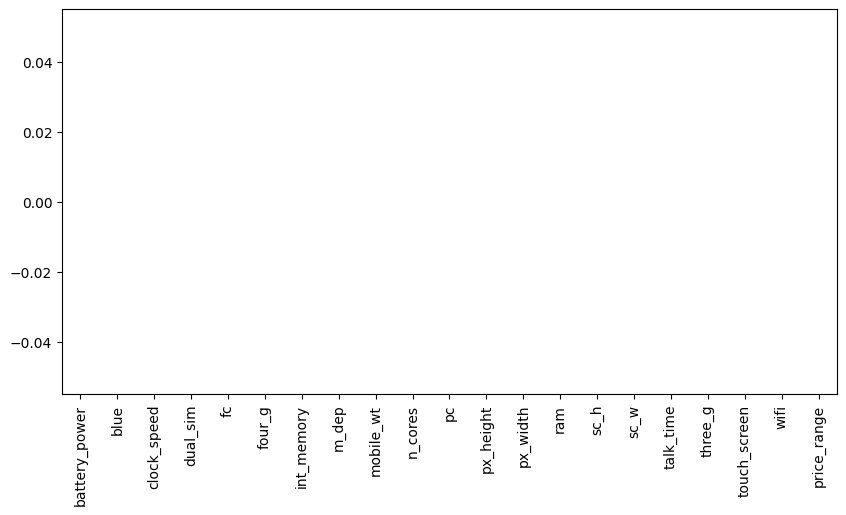

In [ ]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (10,5)
mobile_df.isnull().sum().plot(kind='bar')             #Creating Bar chart

### What did you know about your dataset?

* The dataset contains 21 columns and 2000 rows

* 19 columns have int data type and 2 columns have float data type

* No duplicate values present in the dataset.

* No missing values present in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


From above Describe method we observe that **px_height** (pixel Resolution height) and **sc_w** (screen width) columns have minimum value 0 which is not possible for any mobile. So we will treat these in data wrangling section.

### Variables Description

**Variables Description -**

**1.	Battery_power** - Total energy a battery can store in one time measured in mAh

**2.	Blue** - Has bluetooth or not

**3.	Clock_speed** - speed at which microprocessor executes instructions

**4.	Dual_sim** - Has dual sim support or not

**5.	Fc** - Front Camera megapixels

**6.	Four_g** - Has 4G or not

**7.	Int_memory** - Internal Memory in Gigabytes

**8.	M_dep** - Mobile Depth in cm

**9.	Mobile_wt** - Weight of mobile phone

**10.	N_cores** - Number of cores of processor

**11.	Pc** - primary camera megapixels

**12.	Px_height** - Pixel Resolution Height

**13.	Px_width** - Pixel Resolution Width

**14.	Ram** - Random Access Memory in Megabytes

**15.	Sc_h** - Screen Height of mobile in cm

**16.	Sc_w** - Screen Width of mobile in cm

**17.	Talk_time** - longest time that a single battery charge will last

**18.	Three_g** - Has 3G or not

**19.	Touch_screen** - Has touch screen or not

**20.	Wifi** - Has wifi or not

**21.	Price_range** - price ranges of mobiles .This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(mobile_df.nunique())
for i in mobile_df.columns:
    unique_values = mobile_df[i].unique()
    print('_'*140)
    print(f"Unique values for {i} are: {unique_values}")

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64
____________________________________________________________________________________________________________________________________________
Unique values for battery_power are: [ 842 1021  563 ... 1139 1467  858]
____________________________________________________________________________________________________________________________________________
Unique values for blue are: [0 1]
________________________________________________________________________________________________________________________________________

## 3. ***Data Wrangling***

### Data Wrangling Code

From the Describe method we observed that px_height (pixel Resolution height) and sc_w (screen width) columns have minimum value 0 which is not possible for any mobile.

In [4]:
# Write your code to make your dataset analysis ready.
print("zero values in px_height column=",sum(mobile_df.px_height==0))        # checking for zero values in px_height column
print("zero values in sc_w column=",sum(mobile_df.sc_w==0))                  # checking for zero values in sc_w column


zero values in px_height column= 2
zero values in sc_w column= 180


In [5]:
# Replacing zero value data with mean value

mobile_df['px_height'].replace(to_replace = 0, value = int(mobile_df.px_height.mean()), inplace = True)
mobile_df['sc_w'].replace(to_replace = 0,value = int(mobile_df.sc_w.mean()), inplace = True)

In [6]:
# Rechecking for zero values
print("zero values in px_height column=",sum(mobile_df.px_height==0))
print("zero values in sc_w column=",sum(mobile_df.sc_w==0))

zero values in px_height column= 0
zero values in sc_w column= 0


In [7]:
#Lists of numerical and categorical categories are being created.
numerical_columns=[]
categorical_columns=[]

# using for loop and if condition for seperating features according to unique count
for col in mobile_df.columns:
  if mobile_df[col].nunique()>5:
    numerical_columns.append(col)
  else:
    categorical_columns.append(col)
print(numerical_columns)
print(categorical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [8]:
mobile_df[categorical_columns]        # Data in categorical_columns

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...
1995,1,1,1,1,1,0,0
1996,1,1,0,1,1,1,2
1997,0,1,1,1,1,0,3
1998,0,0,1,1,1,1,0


In [9]:
mobile_df[numerical_columns]          # Data in numerical_columns

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [10]:
# Mobile phones groupby 3g support and 4g
mobile_df.groupby('three_g')['four_g'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,three_g,four_g,Count
1,1,1,1043
2,1,0,480
0,0,0,477


### What all manipulations have you done and insights you found?


* The minimum value of px_height and sc_w should not be 0 as it does not make sense for a phone screen width or pixel height to be 0. So the 0 values are replaced with the mean values.
* We create two groups numerical_columns and categorical_columns. columns having unique values greater then five are considered as numerical columns and columns having unique values less then 5 were considered as categorical columns.
* Large number of mobiles support 4G technology. Mobile which support 4G that also support 3G.
* There are small numbers of devices that don't support neither 4G nor 3G.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 Categorical Data Exploration: Univariate Visualization**

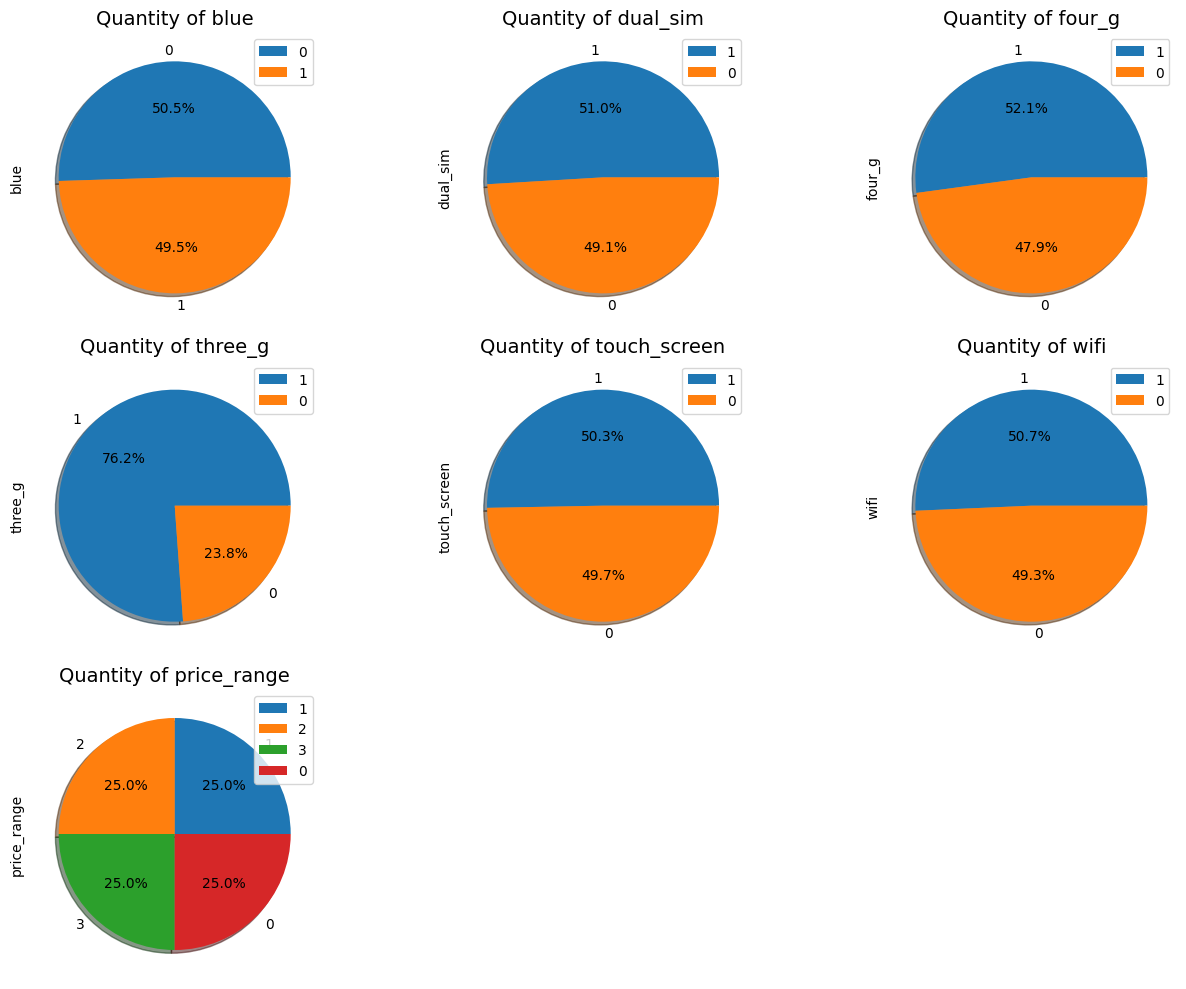

In [ ]:
# Chart - 1 visualization code

count = 1
for var in categorical_columns:
    plt.subplot(3, 3, count)
    mobile_df[var].value_counts().plot.pie(autopct='%1.1f%%', figsize=(13, 10),shadow=True, legend=True)
    plt.title(f'Quantity of {var}', fontsize=14)
    count += 1

plt.tight_layout()
plt.show()


##### **1. Why did you pick the specific chart?**

Pie charts are used when the variable has a limited number of categories, and the goal is to show the proportion or percentage of observations that belong to each category. Pie charts are particularly useful when the number of categories is small, typically between 2 and 6, as they provide an easy-to-read representation of the distribution of the data.

##### **2. What is/are the insight(s) found from the chart?**

By above observation we get to know that features above have almost equal weightage of percentage except 3G. 76% mobile supports 3G because every phone that support 4G also support 3G network. Touchscreen and keypad both phones have almost equal craze. All 4 price range have equals ratio of 25%.


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The insights gained from analyzing binary categorical variables such as Bluetooth, dual SIM support, 4G connectivity, and Wi-Fi can have a positive impact on business growth. These features are in demand among customers and can be used to attract and target specific customer segments.

#### **Chart - 2 Battery Power Comparison between 3G and 4G Network**
#### **Bivariate Analysis (Numerical - Categorical)**

   three_g  four_g  Count
1        1       1   1043
2        1       0    480
0        0       0    477


<Axes: xlabel='non_3g', ylabel='battery_power'>

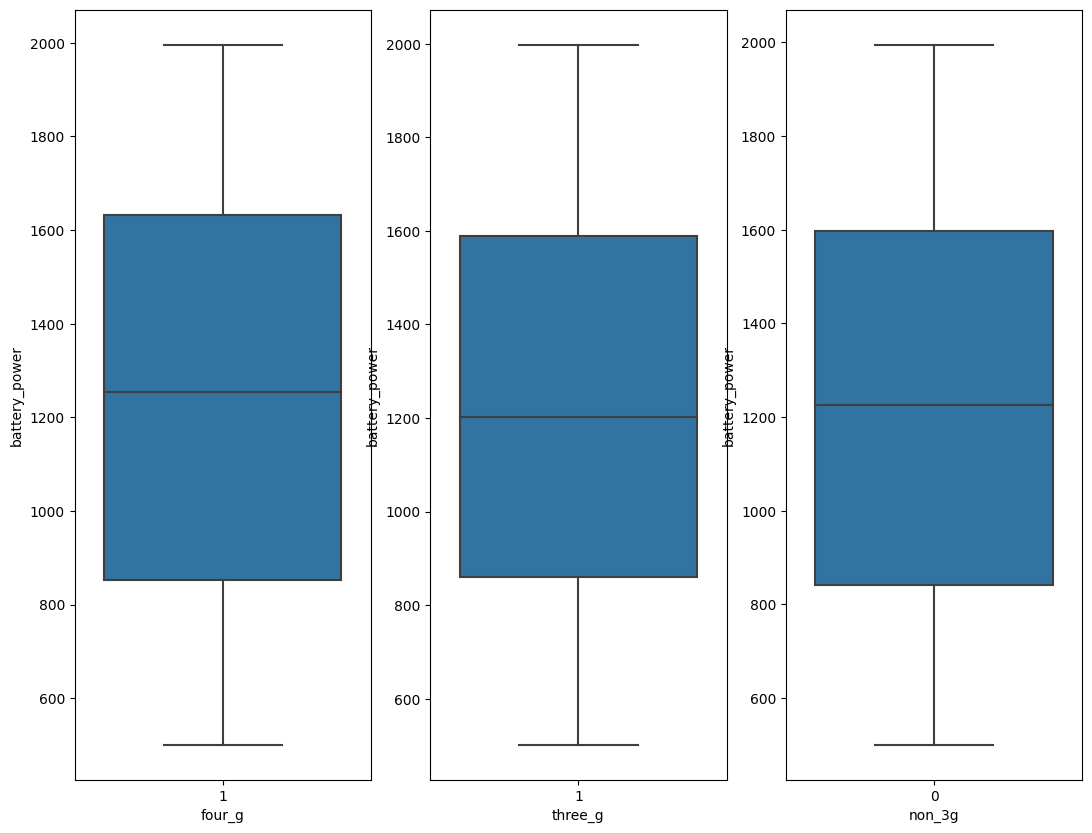

In [ ]:
# Chart - 2 visualization code

# Mobile phones Network Support 3G and 4g count
print(mobile_df.groupby('three_g')['four_g'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False))

# mobile which support 3G and 4G
four_G_mobiles = mobile_df[mobile_df['four_g'] == 1][['four_g', 'battery_power']]

# mobile which support only 3G not 4G
condition = (mobile_df['three_g'] == 1) & (mobile_df['four_g'] == 0)
three_G_mobiles = mobile_df.loc[condition, ['three_g', 'battery_power']]

# mobile which doesn't support 3G or 4G
non_3g_mobiles =mobile_df[mobile_df['three_g'] == 0][['three_g', 'battery_power']]
non_3g_mobiles.rename(columns={'three_g': 'non_3g'}, inplace=True)

# visualizing boxplot chart
plt.figure(figsize=(13, 10))

plt.subplot(1, 3, 1)                                                         # First subplot for 4G mobiles
sns.boxplot(x="four_g", y="battery_power", data=four_G_mobiles)

plt.subplot(1, 3, 2)                                                         # Second subplot for 3G only mobiles
sns.boxplot(x="three_g", y="battery_power", data=three_G_mobiles)

plt.subplot(1, 3, 3)                                                         # Third subplot for Non-3G mobiles
sns.boxplot(x="non_3g", y="battery_power", data=non_3g_mobiles)

##### **1. Why did you pick the specific chart?**

Boxplot is very suitable for  this kind of bivariate problem where numerical data have huge quantity.By comparing the distribution of a variable across different categories or groups (like comparing battery power for different network technologies), box plots allow you to do this efficiently by showing the distributions side by side.

##### **2. What is/are the insight(s) found from the chart?**

All three types of chart shows almost equal area on graph.it indicates that the spread of battery power within each network type is roughly the same. This suggests that there isn't a significant difference in battery power distribution between the network types.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Findings indicate that network technology has minimal impact on battery power, We could use this information in our marketing materials to highlight the benefits of your devices. Promoting that our devices provide good battery life across different network types could attract customers.

#### **Chart - 3 Visualizing Battery power and Price Variations**
**Bivariate Analysis (Numerical - Categorical)**

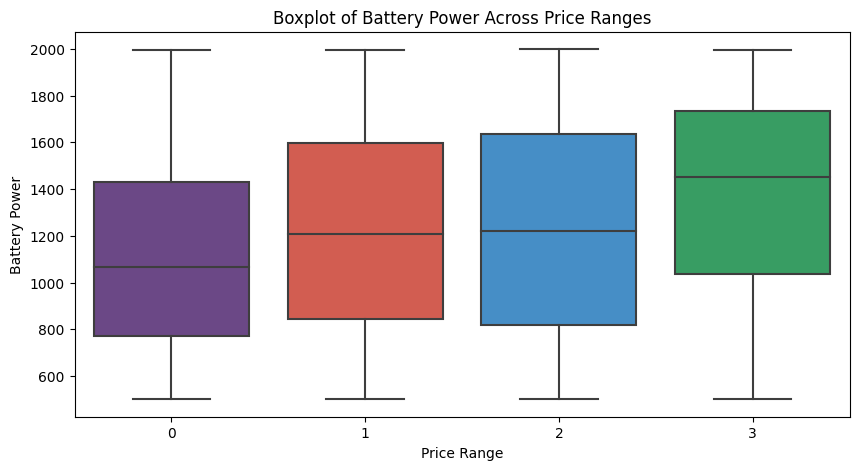

In [ ]:
# Chart - 3 visualization code

# colors palette for some shining dark colors in this graph
custom_palette = ["#6C3E90", "#E74C3C", "#3191DB", "#27AE60"]

# creating box plot for visualizing battery power among different price range
ax = sns.boxplot(x="price_range", y="battery_power", data=mobile_df, palette=custom_palette)

# Add title and labels
ax.set_title("Boxplot of Battery Power Across Price Ranges")
ax.set_xlabel("Price Range")
ax.set_ylabel("Battery Power")

# Show the plot
plt.show()


##### **1. Why did you pick the specific chart?**

Box plots provide a clear comparison of the distribution of battery power across different price ranges. Each box represents the interquartile range (IQR) of the battery power within a specific price range, making it easy to compare the central tendency and spread of battery power among different price groups.

##### **2. What is/are the insight(s) found from the chart?**

The chart shows that there is a positive correlation between battery power and price range. This means that as the battery power increases the price range also goes up. The chart also shows that there is some variation in battery power within each price range, but the variation is smaller for higher price ranges. The chart suggests that battery power is an important factor that affects the price of a mobile device.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights may help creating a positive business impact if we use them to make informed decisions about product. For example

* How can we optimize the battery power of device to meet the needs and preferences of target market?
* How can we differentiate our device from your competitors based on battery power and other features?

There are no insights that lead to negative growth by themselves, but there may be some challenges like:-
* How does the battery power of device affect its cost, weight, and size?
* How does the battery power of device affect its safety, security, and reliability?

#### **Chart - 4 Comparison of Primary vs. Front Camera Megapixels**
**Bivariate Analysis (Numerical - Numerical)**

Text(0.5, 0, 'MegaPixels')

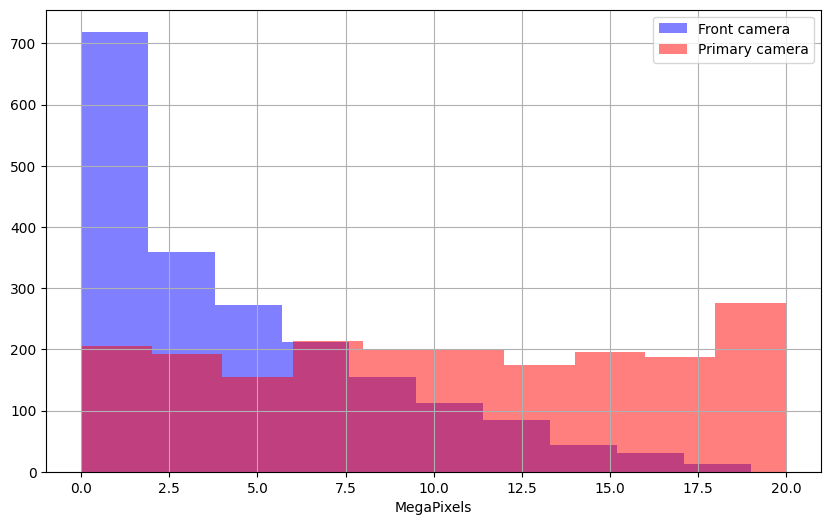

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
mobile_df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
mobile_df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

##### **1. Why did you pick the specific chart?**

Histogram is a type of graph that shows the distribution of numerical data by using bars of different heights. It is useful for this graph because it shows how many phones have a certain number of megapixels in the primary and front camera. We can compare the blue and red bars to see which camera has more or less megapixels in different ranges. For example, we can see that most phones have low megapixels in the front camera and high megapixels in the primary camera.



##### **2. What is/are the insight(s) found from the chart?**

* There is a large variation in the number of megapixels in the primary camera, ranging from 0.0 to 20.0, while the front camera has a smaller variation, ranging from 0.0 to 19.
* There is a negative correlation between the number of megapixels in the primary and front camera, meaning that phones with higher megapixels in the primary camera tend to have lower megapixels in the front camera, and vice versa.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights may help creating a positive business impact if they are used to identify the market demand and preferences for different camera qualities and features. For example, if a company is planning to launch a new smartphone, they can use this information to decide on the specifications of the front and primary cameras. Additionally, businesses can also use this information to identify potential gaps in the market and develop products that fullfill consumer needs.

#### **Chart - 5 Comparison of Price Ranges for Phones with and without 4G Capabilities**
**Bivariate Analysis (Categorical - Categorical)**


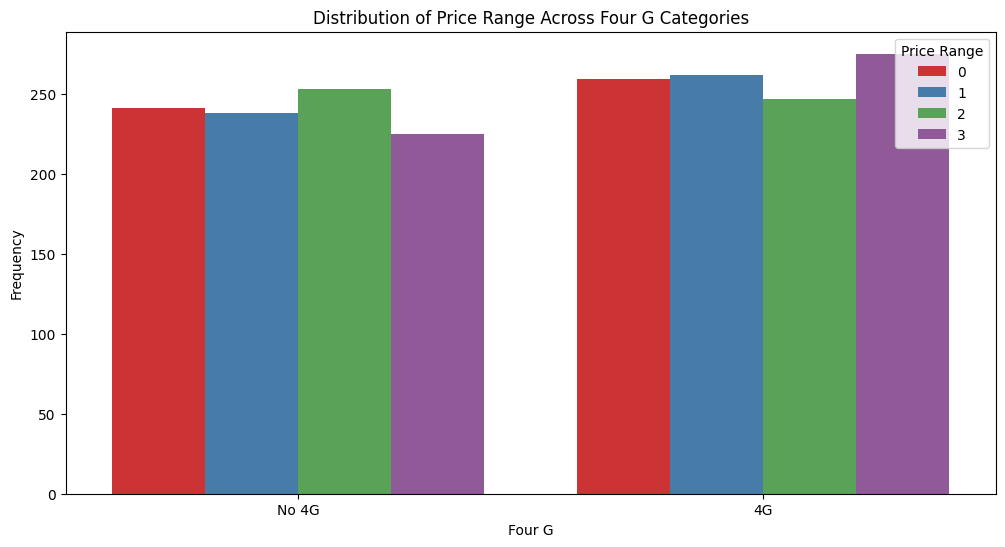

In [ ]:
# Mapping for legend labels
legend_mapping = {0: "No 4G", 1: "4G"}

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=mobile_df, x="four_g", hue="price_range", palette="Set1")

# Set title and labels
plt.title("Distribution of Price Range Across Four G Categories")
plt.xlabel("Four G")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["No 4G", "4G"])
ax.legend(title="Price Range", labels=[i for i in range(4)], loc="upper right")

plt.show()


##### **1. Why did you pick the specific chart?**

we use countplot chart it is a good choice as we want to show the counts of observations in each categorical bin using bars. Using a countplot chart to visualize the distribution of price ranges and 4G capabilities can help to understand the market trends

##### **2. What is/are the insight(s) found from the chart?**

* From the chart above we can see that the frequency of different price ranges for phones with and without 4G capabilities is different. The bars for “4G” are all taller than the bars for “No 4G”, indicating that there are more phones with 4G capabilities in each price range.

* On the other hand, the bars for “No 4G” are all roughly the same height, with the red and green bars being slightly taller than the blue and purple bars.




##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights can help businesses to make informed decisions when it comes to marketing and selling phones with and without 4G capabilities. For example, businesses can use the information about the distribution of price ranges for phones with and without 4G capabilities to adjust their pricing strategies and target specific market segments.

As for negative growth, the chart does not provide any specific insights that would lead to negative growth. It is important for businesses to use the insights gained from this chart in conjunction with other information and data to make informed decisions that will have a positive impact on their growth.

#### **Chart - 6 RAM vs. Price Range: A Scatter Plot Analysis**
**Bivariate Analysis (Numerical - Categorical)**

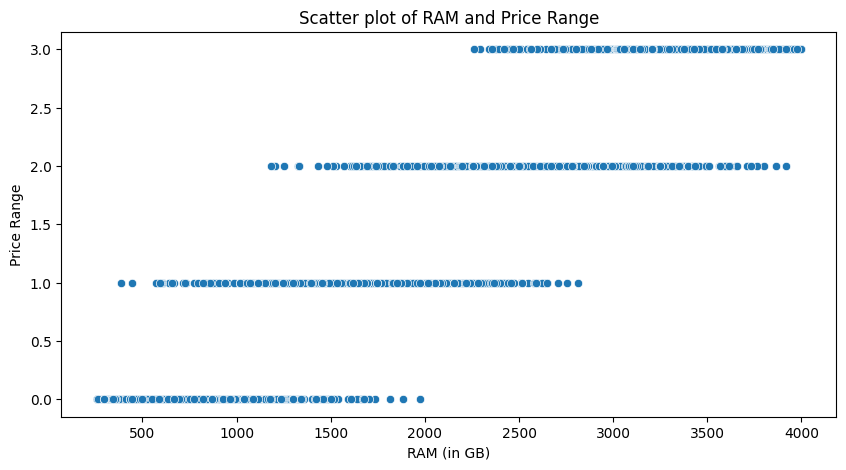

In [ ]:
# Chart - 6 visualization code
sns.scatterplot(x='ram', y='price_range', data=mobile_df)
plt.title('Scatter plot of RAM and Price Range')
plt.xlabel('RAM (in GB)')
plt.ylabel('Price Range')
plt.show()

##### **1. Why did you pick the specific chart?**

Scatter plots are a powerful tool for visualizing the relationship between two variables and it represents individual data points as dots on a graph, making it easier to visualize the distribution and spread of the data. This can be helpful in identifying outliers or clusters within the data set. We are particularly using it for exploring the relationship between Ram and Price Range.

By examining the pattern of the data points in a scatterplot, we can gain valuable insights into the relationship between the two variables and identify trends, patterns, or outliers that may be important for understanding the business.

##### **2. What is/are the insight(s) found from the chart?**

From the above scatter plot we can see that there is a slight increase in price range as RAM increases. The data points are spread out horizontally, with most of the points clustered in the lower price ranges. This suggests that there is a positive correlation between RAM and price range, meaning that phones with higher RAM tend to be in higher price ranges.


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The insights gained can help businesses make informed decisions when it comes to marketing and selling phones with different RAM capacities. For example, businesses can use the information about the relationship between RAM and price range to adjust their pricing strategies and target specific market segments.

As for negative growth, the scatter plot does not provide any specific insights that would lead to negative growth. It is important for businesses to use the insights gained from this scatter plot in conjunction with other information and data to make informed decisions that will have a positive impact on their growth.

#### **Chart - 7 Talk Time Trends in Different Price Categories**
**Bivariate Analysis (Numerical - Categorical)**

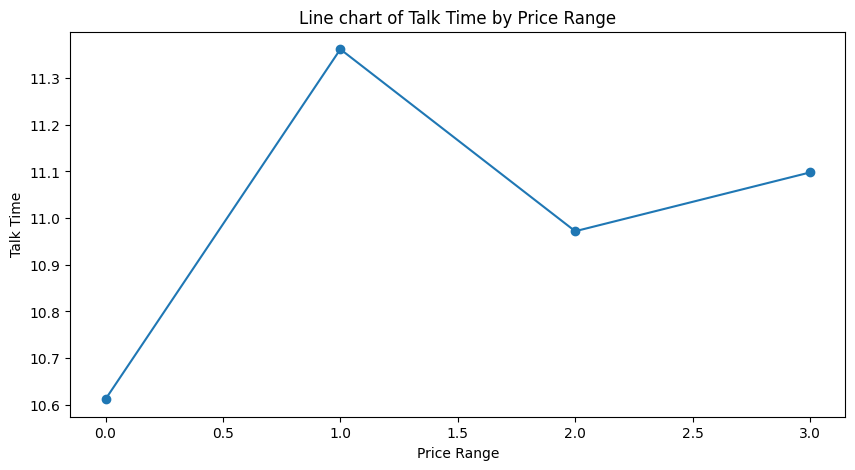

In [ ]:
# Chart - 7 visualization code
talk_time = mobile_df.groupby('price_range')['talk_time'].mean()
plt.plot(talk_time.index, talk_time, marker='o')
plt.title('Line chart of Talk Time by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Talk Time')
plt.show()


##### **1. Why did you pick the specific chart?**

 Line charts are effective for showing how data points are connected and how they change over time. Line charts use lines to connect data points, making it easy to see the overall direction of the data. This makes it straightforward to identify increasing, decreasing, or stable trends in your data. We use it on talktime and see will price increase for mobiles having more talktime capacity.

##### **2. What is/are the insight(s) found from the chart?**

The chart suggests that there is a weak positive correlation between the price range and the talk time, meaning that as the price range increases, the talk time also tends to increase slightly. However, the correlation is not very strong, as the third data point shows a decrease in talk time for a higher price range.


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

if the business wants to target customers who value talk time over other features, then the insights may help them to offer competitive prices and quality for the lower price range phones. However, if the business wants to attract customers who are looking for more advanced and diverse features, then the insights may not be very useful, as they do not show how the price range affects other aspects of the phones.

However there is a possible scenarios that could result in negative growth:

If the mobile phone in the highest price range has a lower talk time due to a faulty or defective battery, then this could damage the reputation and customer satisfaction of the business, leading to lower sales and revenue.

#### **Chart - 8 Relationship between Clock Speed and Number of Cores**
**Bivariate Analysis (Numerical - Numerical)**

Text(0, 0.5, 'clock_speed')

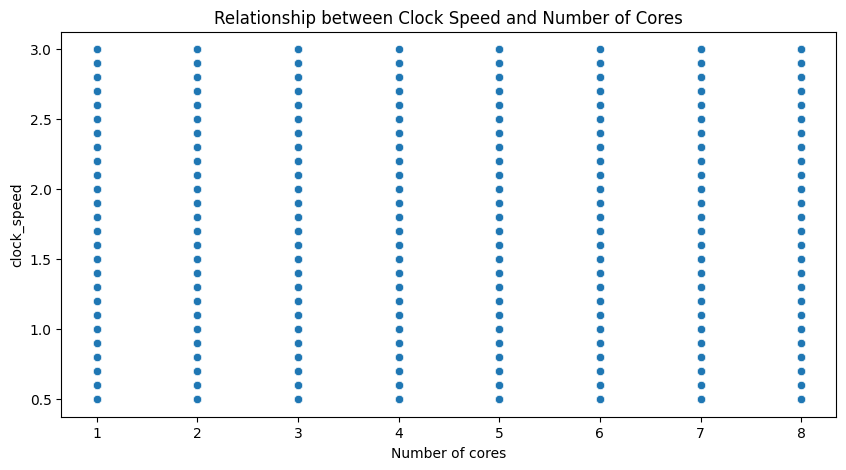

In [ ]:
# Chart - 8 visualization code
sns.scatterplot(x = 'n_cores',y = 'clock_speed',data = mobile_df)
plt.title('Relationship between Clock Speed and Number of Cores')
plt.xlabel('Number of cores')
plt.ylabel('clock_speed')

##### **1. Why did you pick the specific chart?**

A scatter plot allows you to assess the relationship between two variables and determine if there is any correlation between them. By plotting numberof cores on the x-axis and clock speed on the y-axis, we can visually inspect if there is any pattern or trend between the two variables.

##### **2. What is/are the insight(s) found from the chart?**

The data shows that there is a positive correlation between the number of cores and the clock speed of mobile phone processors, meaning that as the number of cores increases, so does the clock speed. This might be because having more cores allows the processor to handle more tasks simultaneously, and thus requires higher clock speed to execute them efficiently.

The data shows that there is a large variation in the number of cores and the clock speed among different mobile phone processors, ranging from 1 to 8 cores and from 0.5 to 3 GHz. This might be because different processors are designed for different purposes and target different segments of the market. For example, some processors might prioritize energy efficiency over performance, while others might focus on delivering high performance for gaming or multimedia applications.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights can help creating a positive business impact if they are used to make strategic decisions and actions that creates the opportunities and challenges of mobile phone processors.

Segmenting and targeting the mobile phone market based on the different needs and preferences of consumers for processor performance, energy efficiency, gaming, multimedia, and other applications .


#### **Chart - 9 How Mobile Weight Varies Across Different Price Ranges**
**Bivariate Analysis (Numerical - Categorical)**

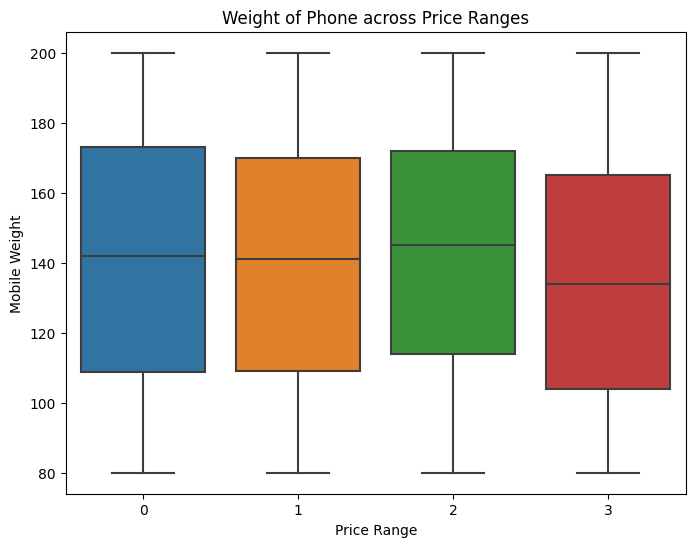

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(8, 6))
sns.boxplot(data=mobile_df, x='price_range', y='mobile_wt')
plt.xlabel('Price Range')
plt.ylabel('Mobile Weight')
plt.title('Weight of Phone across Price Ranges')
plt.show()


##### **1. Why did you pick the specific chart?**

 Box plots provide a clear visualization of how data is distributed along a numerical axis. You can quickly see if the data is symmetric or skewed, and whether it has any outliers. The line inside the box represents the median, which is a measure of the central tendency. We use boxplot chart to know how does the weight of the phone vary across different price ranges.

##### **2. What is/are the insight(s) found from the chart?**

There are significant differences in the weight of mobile phones across different price ranges. The interquartile ranges (IQR) and median values vary noticeably between the price ranges, indicating distinct weight characteristics for each range.

The range of weights for price range 0 is the widest, while the range of weights for price range 3 is the narrowest. This implies that there is more variation in the weight of mobiles in the lower price range, and less variation in the weight of mobiles in the higher price range. This could be due to the different features, materials, and quality of mobiles in different price ranges.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**


The gained insights regarding the significant differences in the weight of mobile phones across different price ranges can help create a positive business impact. By understanding the weight preferences of customers in each price range, businesses can develop targeted marketing strategies and product offerings to cater to specific customer segments. This can lead to increased customer satisfaction, better market positioning, and potentially higher sales and revenue.

#### **Chart - 10 The Distribution of Wi-Fi and Bluetooth Features in Mobiles by Price Range**

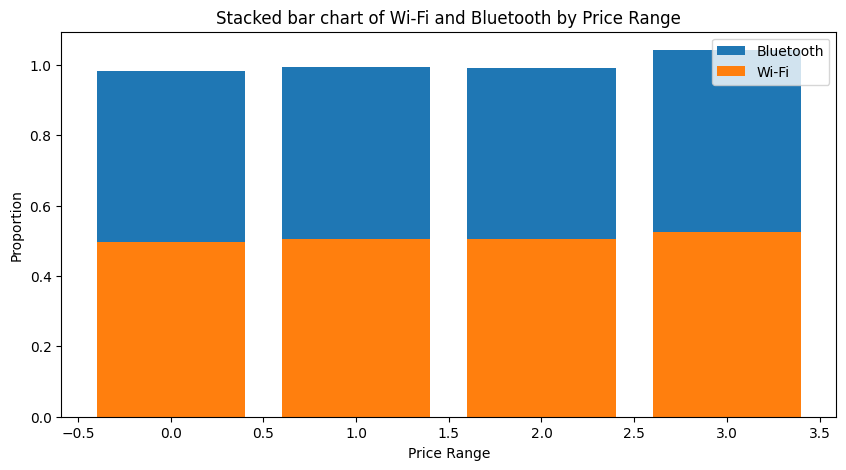

In [ ]:
# Chart - 10 visualization code
# Using groupby method to group mean of wifi and bluetooth columns according to pricerange (0,1,2,3)
wifi = mobile_df.groupby('price_range')['wifi'].mean()
bluetooth = mobile_df.groupby('price_range')['blue'].mean()

plt.bar(bluetooth.index, bluetooth, bottom=wifi, label='Bluetooth')
plt.bar(wifi.index, wifi, label='Wi-Fi')
plt.legend()
plt.title('Stacked bar chart of Wi-Fi and Bluetooth by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion')
plt.show()

##### **1. Why did you pick the specific chart?**

 Stacked bar charts are used to illustrate the composition and comparison of parts within a whole, making them particularly useful for showing how individual components contribute to a total value. We useStacked bar chart to compare the composition of bluetooth and Wifi categories side by side over price Range.

##### **2. What is/are the insight(s) found from the chart?**

The proportion of Wi-Fi is higher than Bluetooth in all price ranges, which means that Wi-Fi is more popular than Bluetooth among mobile users.

The highest proportion of Wi-Fi is in the price range 3, which means that most of the mobiles in this price range have Wi-Fi. This could be because Wi-Fi is a more essential and desirable feature for mobile users who can afford higher-priced mobiles.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights from the chart may help creating a positive business impact.If the goal is to increase the sales of mobiles that have Wi-Fi and Bluetooth features, then the manufacturers may want to target the customers in the higher price ranges, as they are more likely to have both features in their mobiles.

I do not think there are any insights that lead to negative growth, as the chart only shows the descriptive statistics of Wi-Fi and Bluetooth by price range.

#### **Chart - 11 The Relationship between Screen Height, Screen Width and Price Range**

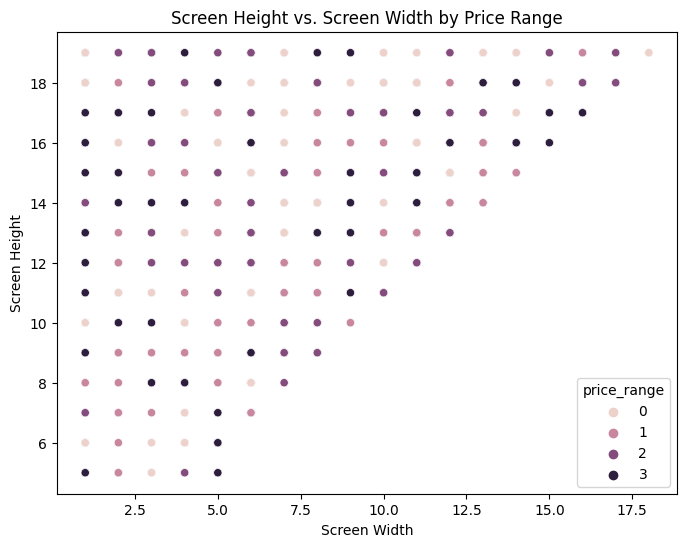

Correlation between Screen Height, Screen Width, and Price Range:
                 sc_h      sc_w  price_range
sc_h         1.000000  0.505464     0.022986
sc_w         0.505464  1.000000     0.032826
price_range  0.022986  0.032826     1.000000


In [ ]:
# Chart - 11 visualization code
# Scatter plot of screen height and screen width with price range
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mobile_df, x='sc_w', y='sc_h', hue='price_range')
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.title('Screen Height vs. Screen Width by Price Range')
plt.show()

# Correlation between screen height, screen width and price range
corr_sc = mobile_df[['sc_h', 'sc_w', 'price_range']].corr()
print('Correlation between Screen Height, Screen Width, and Price Range:')
print(corr_sc)


##### **1. Why did you pick the specific chart?**

  Scatter plot is a type of graph that uses dots to represent values for two different numeric variables. It is useful for showing the relationship between the variables, such as whether they are correlated, how strong the correlation is, and what kind of pattern or trend they follow. We use scatter plot to check how do the screen height (sc_h) and screen width (sc_w) relate to the price range

##### **2. What is/are the insight(s) found from the chart?**

1. There is a positive correlation of approximately 0.51 between screen height and screen width, indicating that as one of these dimensions increases, the other tends to increase as well.
2. The correlation between screen height and price range is very weak (approximately 0.02), suggesting that there is no significant linear relationship between these variables.
3. Similarly, the correlation between screen width and price range is also very weak (approximately 0.04), indicating no substantial linear association between these variables.


Therefore, based on the correlation coefficients, there is no strong relationship between screen height, screen width, and the price range of mobile phones.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**


The correlation analysis suggests that there is no significant relationship between screen height, screen width, and the price range of mobile phones. Therefore, the obtained insights may not directly contribute to creating a positive business impact.

#### **Chart - 12 The Relationship between Pixel Width, Pixel Height and Price Range**

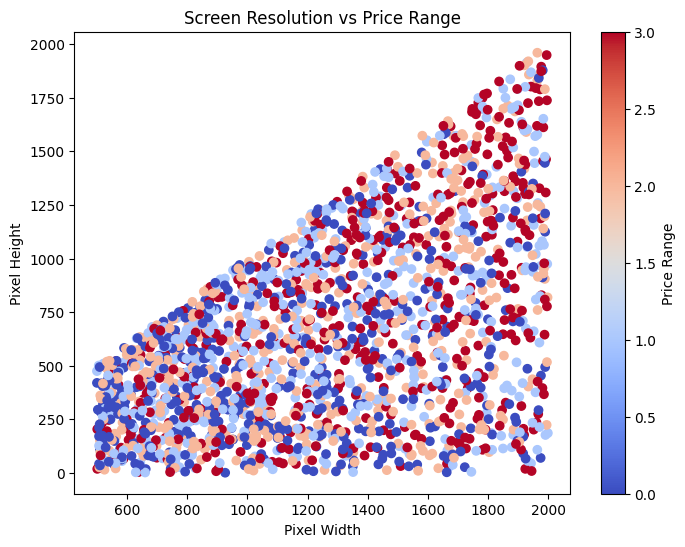

Correlation between Pixel Width, Pixel Height and Price Range:
             px_width  px_height  price_range
px_width     1.000000   0.512011     0.165818
px_height    0.512011   1.000000     0.149666
price_range  0.165818   0.149666     1.000000


In [11]:
# Chart - 12 visualization code

plt.figure(figsize=(8, 6))
plt.scatter(mobile_df['px_width'], mobile_df['px_height'], c=mobile_df['price_range'], cmap='coolwarm')
plt.colorbar(label='Price Range')
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.title('Screen Resolution vs Price Range')
plt.show()

# Correlation between Pixel Width, Pixel Height and price range
corr_sc = mobile_df[['px_width', 'px_height', 'price_range']].corr()
print('Correlation between Pixel Width, Pixel Height and Price Range:')
print(corr_sc)



##### **1. Why did you pick the specific chart?**

I pick scatter plot to show the correlation between screen resolution and price range, which is the main purpose of this visualization. By looking at the shape and direction of the data points, we can see whether there is a positive, negative, or no correlation between the variables

##### **2. What is/are the insight(s) found from the chart?**

From the scatter plot comparing the screen height and screen width with the price range, it can be observed that there is no clear correlation or pattern indicating that phones with higher screen resolutions (px_height and px_width) are generally associated with higher price ranges. The data points are scattered across different price ranges, suggesting that screen resolution alone may not be a strong determinant of the price range.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The insights regarding the relationship between screen resolutions and price ranges may not directly create a positive business impact. Customers do not prioritize screen resolution as a determining factor, so focusing solely on it may not lead to significant growth.

#### **Chart - 13 Ram vs internal memory dual axis plot**

                ram  int_memory
price_range                    
0             785.0        31.0
1            1679.0        32.0
2            2583.0        31.0
3            3449.0        34.0


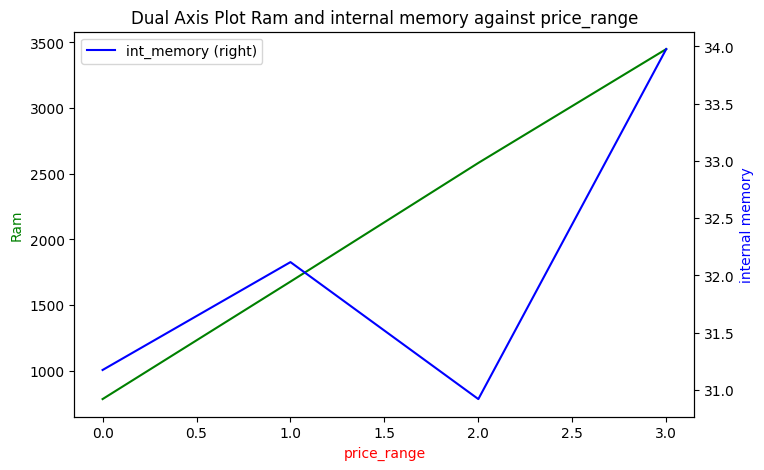

In [ ]:
# Chart - 13 visualization code

memory_data=mobile_df.groupby("price_range")[["ram","int_memory"]].mean()
print(round(memory_data))

# plotting figures by creating axes object using subplots() function
fig, ax = plt.subplots(figsize = (8,5))
plt.title('Dual Axis Plot Ram and internal memory against price_range')

ax=memory_data["ram"].plot(kind= "line", color = 'green')
ax2=memory_data["int_memory"].plot(kind= "line", secondary_y = True, color = 'blue',ax=ax)

# giving labels to the axises
ax.set_xlabel('price_range', color = 'r')
ax.set_ylabel('Ram', color = 'g')
plt.legend()
# secondary y-axis label
ax2.set_ylabel('internal memory', color = 'b')

plt.show()

##### **1. Why did you pick the specific chart?**

A dual-axis line plot allows you to visualize and compare two variables simultaneously. it is useful to understand the relationship or correlation between two variables and observe their trends over time or another shared dimension.

We use dual-axis line plot to see how RAM and internal memory vary across different price ranges, and whether they have a positive or negative correlation with price.

##### **2. What is/are the insight(s) found from the chart?**

* The chart suggests that there is a positive correlation between RAM and price range, meaning that as the price range increases, so does the RAM. This makes sense, as higher RAM usually means better performance and speed, which are desirable features for customers who are willing to pay more.

* The most interesting aspect is the dip in internal memory from price range 1 to 2. This implies that there may be a category of mid-range phones (in the 1 to 2 price range) that offer less internal memory compared to both lower and higher-priced phones. This could be due to cost optimization in this specific price range or focus on other features besides internal memory.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights could help creating a positive business impact for example:
To identify the target market segments and customer preferences for different price ranges, RAM, and internal memory. This could help in designing and marketing the devices that meet the customer needs and expectations, and increase customer satisfaction and loyalty.

#### **Chart - 14 - Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap for Mobile price range data')

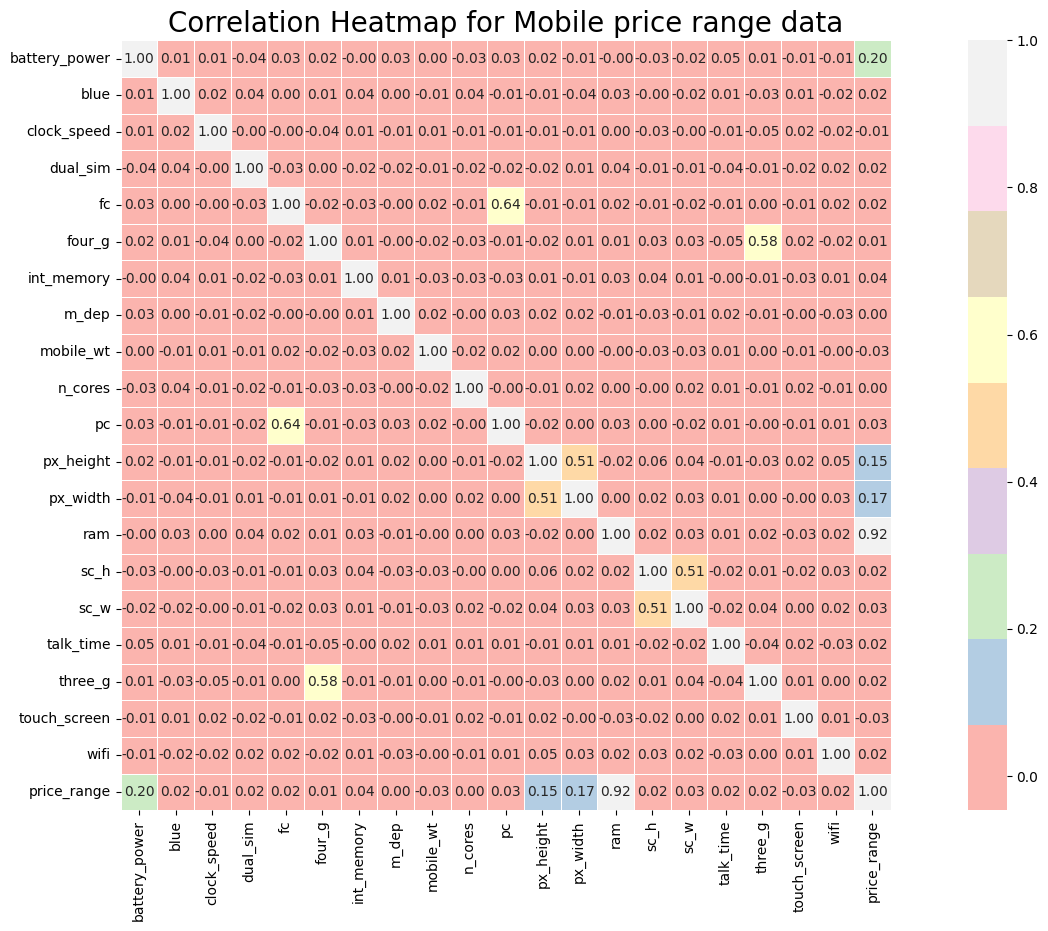

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (20,10))
sns.heatmap(mobile_df.corr(),annot= True,fmt=".2f",cmap=plt.cm.Pastel1,square=True,linewidth=0.5)
plt.title('Correlation Heatmap for Mobile price range data', size=20)

##### **1. Why did you pick the specific chart?**

We use correlation heatmap to check for correlation among the features visually. Each cell in the heatmap represents the correlation between two variables. In our case if two variables have a positive correlation, the heatmap will show a lighter color and if two variables have a negative correlation, the heatmap will show a darker color.

##### **2. What is/are the insight(s) found from the chart?**

* The high correlation between RAM and price_range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.
* There are also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of features ('pc', 'fc') and ('px_width', 'px_height'). These correlations make sense, as a phone with a good front camera is likely to have a good back camera, and an increase in pixel height typically corresponds with an increase in pixel width.

#### **Chart - 15 - Pair Plot**

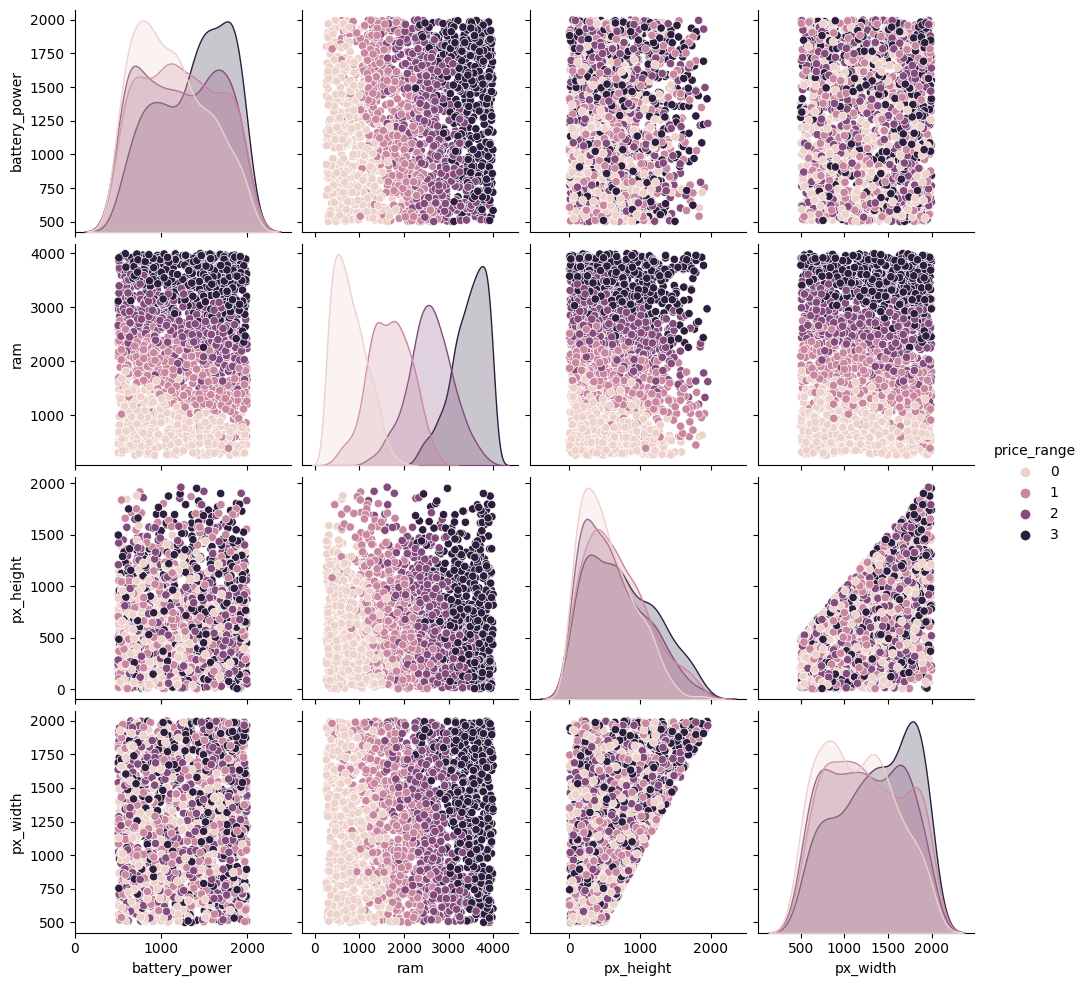

In [ ]:
# Pair Plot visualization code

# Select the columns for the pair plot
columns = ['battery_power', 'ram', 'px_height', 'px_width', 'price_range']

# Create a DataFrame with the selected columns
pair_df = mobile_df[columns]

# Create the pair plot
sns.pairplot(pair_df, hue='price_range')

# Show the plot
plt.show()

##### **1. Why did you pick the specific chart?**

We use pair plot chart to visualize the pairwise relationships between multiple variables in the given dataset.

##### **2. What is/are the insight(s) found from the chart?**

1. Battery Power vs. RAM: There is a positive correlation between battery power and RAM. As the battery power increases, the RAM capacity tends to increase as well.

2. Battery Power vs. Price Range: There doesn't seem to be a clear linear relationship between battery power and price range. However, higher-priced phones tend to have a wider range of battery power values compared to lower-priced phones.

3. RAM vs. Price Range: There is a clear positive correlation between RAM and price range. Higher-priced phones generally have higher RAM capacities.

4. Pixel Height vs. Pixel Width: There is a positive correlation between pixel height and pixel width. As the pixel height increases, the pixel width also tends to increase.

5. Pixel Height vs. Price Range: There doesn't appear to be a strong linear relationship between pixel height and price range. However, it seems that higher-priced phones tend to have a wider range of pixel height values compared to lower-priced phones.

6. Pixel Width vs. Price Range: Similar to pixel height, there isn't a strong linear relationship between pixel width and price range. Higher-priced phones exhibit a wider range of pixel width values.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### **Hypothetical Statement  1- In 25% mobiles the three_g is not available and in 75% mobiles three_g is available**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The proportion of times when three_G is not available is <= 0.25, and the proportion of times when three_G is available is>=0.75.

**Alternative Hypothesis (Ha):** The proportion of times when three_G is not available is > 0.25, or the proportion of times when three_G is available is < 0.7

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Define the null hypothesis proportions
p_null_failure = 0.25
p_null_success = 0.75

# Calculate the observed proportions
n_failure = np.sum(mobile_df.three_g == 0)
n_success = np.sum(mobile_df.three_g == 1)
observed_proportion_failure = n_failure / len(mobile_df.three_g)
observed_proportion_success = n_success / len(mobile_df.three_g)

# Perform a one-sample proportion z-test
p_hat_failure = observed_proportion_failure
p_hat_success = observed_proportion_success
n = len(mobile_df.three_g)

# Calculate the standard error
standard_error_failure = np.sqrt(p_null_failure * (1 - p_null_failure) / n)
standard_error_success = np.sqrt(p_null_success * (1 - p_null_success) / n)

# Calculate the z-score for failure and success
z_failure = (p_hat_failure - p_null_failure) / standard_error_failure
z_success = (p_hat_success - p_null_success) / standard_error_success

# Calculate the p-value for the z-test
p_value_failure = 1 - stats.norm.cdf(z_failure)
p_value_success = stats.norm.cdf(z_success)

# Print the results
print("Z-score for failure:", z_failure)
print("P-value for failure:", p_value_failure)
print("Z-score for success:", z_success)
print("P-value for success:", p_value_success)

# Interpret the results
alpha = 0.05                     # Significance level
if p_value_failure < alpha or p_value_success < alpha:
    print("Reject the null hypothesis: The proportion of times when three_G is not available is > 0.25, or the proportion of times when three_G is available is < 0.7")
else:
    print("Null hypothesis accepted: The proportion of times when three_G is not available is <= 0.25, and the proportion of times when three_G is available is>=0.75.")


Z-score for failure: -1.1877148928369423
P-value for failure: 0.8825271228415327
Z-score for success: 1.1877148928369365
P-value for success: 0.8825271228415316
Null hypothesis accepted: The proportion of times when three_G is not available is <= 0.25, and the proportion of times when three_G is available is>=0.75.


##### Which statistical test have you done to obtain P-Value?

I performed a one-sample proportion z-test to obtain the p-values.

##### Why did you choose the specific statistical test?

This z-test is used to assess whether the observed proportion of "failure" in three_g data significantly differs from the assumed proportion specified in the null hypothesis.

The p-value obtained from this one-sample proportion z-test tells us whether the observed proportion of "failure" in our data significantly deviates from the proportion specified in the null hypothesis. If the p-value is less than a chosen significance level (commonly set at 0.05), we would typically reject the null hypothesis in favor of the alternative hypothesis. In our case p value is 0.88 which is higher then significance level so Null hypothesis is accepted.

### **Hypothetical Statement 2- The positive effect of Ram on Price Range is observable.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** Ram and Price Range is dependent to each other.

**Alternative hypothesis (Ha)**: Ram and Price Range are independent for each other.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table
contingency_table = pd.crosstab(mobile_df['ram'], mobile_df['price_range'])
print(contingency_table)

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print("Null hypothesis (H0) accepted Ram and Price Range is dependent to each other.")
else:
    print("Alternative hypothesis (Ha) accetped: Ram and Price Range are independent for each other.")


price_range  0  1  2  3
ram                    
256          1  0  0  0
258          2  0  0  0
259          1  0  0  0
262          1  0  0  0
263          1  0  0  0
...         .. .. .. ..
3990         0  0  0  1
3991         0  0  0  2
3993         0  0  0  1
3996         0  0  0  1
3998         0  0  0  1

[1562 rows x 4 columns]
Chi-squared statistic: 5404.666666666667
P-value: 5.726600585736166e-13
Null hypothesis (H0) accepted Ram and Price Range is dependent to each other.


##### Which statistical test have you done to obtain P-Value?

I use chi-squared test to obtain p-Value.

##### Why did you choose the specific statistical test?

The chi-squared test is commonly used where we to have created a contingency table showing the relationship between "ram" and "price_range. The chi-squared test help me to answer questions like:

* Does ram and price range related or independent of each other?

* Can we reject the null hypothesis that ram and price range are independent?

By performing a chi-squared test on the contingency table, we can obtain a p-value. If the p-value is below a chosen significance level (commonly set at 0.05), we can conclude that there is a statistically relation between the two variables. if the p-value is above the significance level it indicates that there is no relation between the variables, and they can be considered independent. In our case p_value is below 0.05 so Null hypothesis is accepted.

### **Hypothetical Statement 3- Whether there is a significant difference in mobile phone weights across different price ranges**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in mobile phone weights across different price ranges.

**Alternative Hypothesis (Ha):** There is a significant difference in mobile phone weights across different price ranges.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Separate the data into groups based on price_range
grouped_data = [mobile_df['mobile_wt'][mobile_df['price_range'] == i] for i in range(4)]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05              # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis Alternative hypothesis (Ha) accetped. There is a significant difference in mobile weights across different price ranges.")
else:
    print("Null hypothesis (H0) accepted. There is no significant difference in mobile weights across different price ranges.")


F-statistic: 3.5943181851536896
P-value: 0.013117390712873744
Reject the null hypothesis Alternative hypothesis (Ha) accetped. There is a significant difference in mobile weights across different price ranges.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing values present in the dataset.

### 2. Handling Outliers

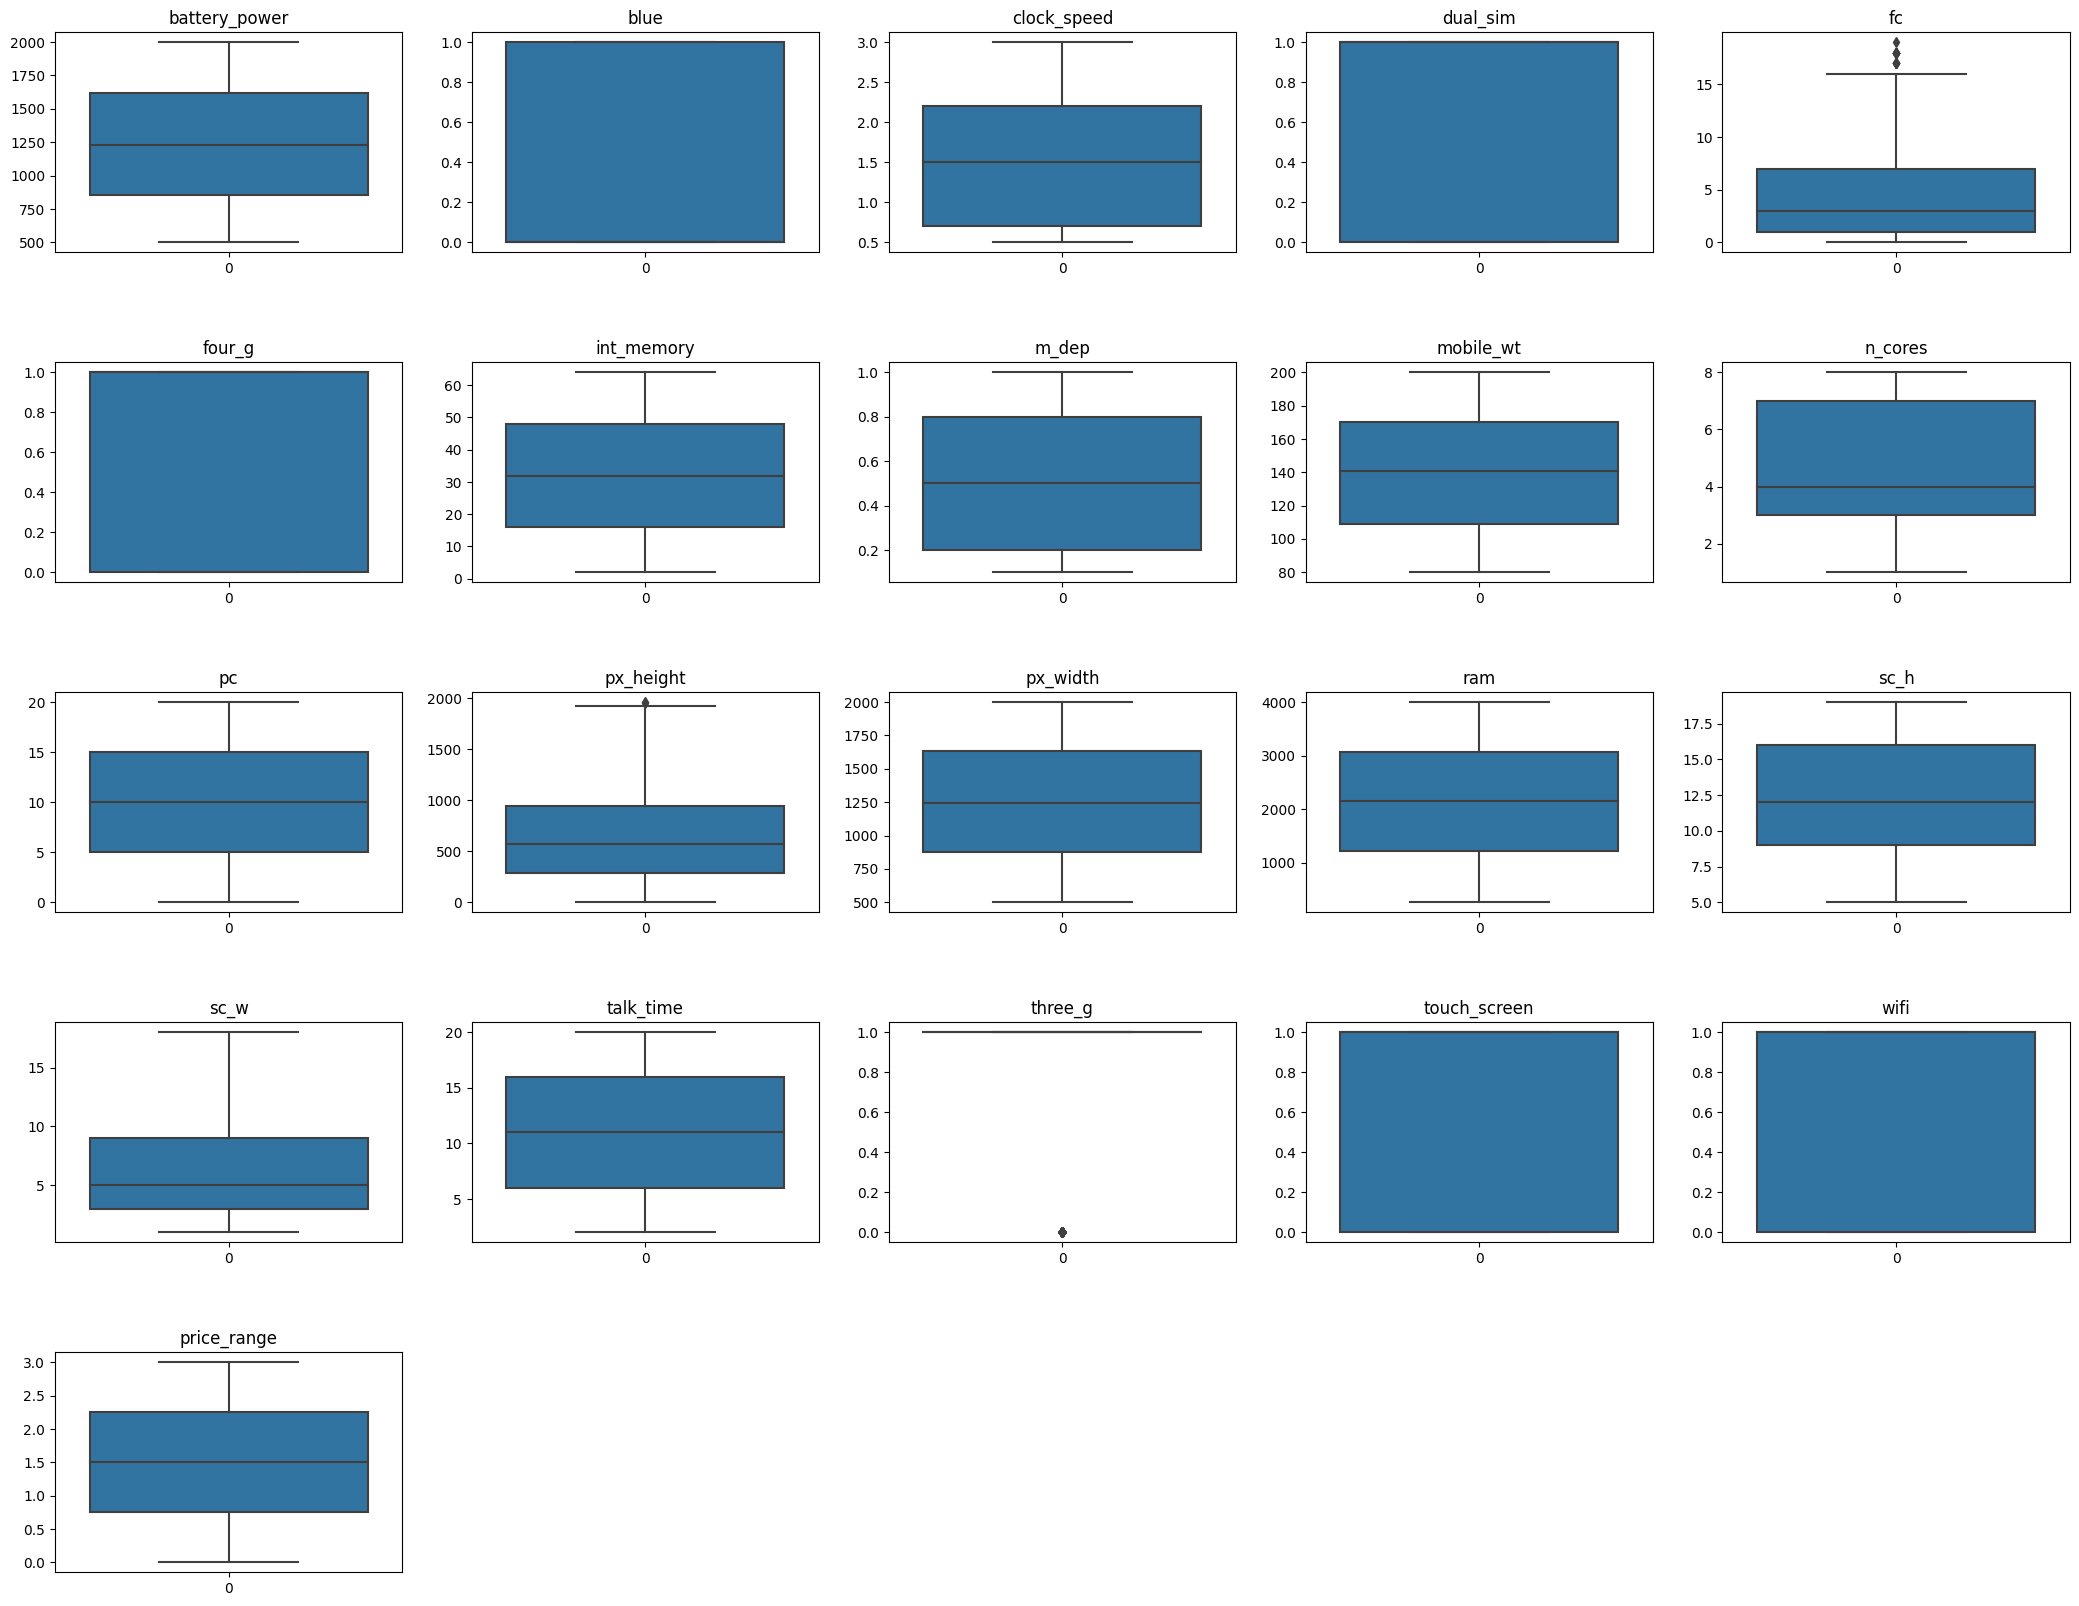

In [ ]:
# Handling Outliers & Outlier treatments
# Set the figure size
plt.figure(figsize=(26,20))

# Loop through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in mobile_df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Create a box plot of the current column's data
  sns.boxplot(mobile_df[item])

  # Add the column name to the subplot title
  plt.title(item)

  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

# Add a newline for clarity
print("\n")


##### What all outlier treatment techniques have you used and why did you use those techniques?

Their is no much outliers are present no need to do much experiment.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Check data type of all columns
mobile_df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#### What all categorical encoding techniques have you used & why did you use those techniques?


Categorical encoding refers to the process of converting categorical data For example, colors, countries, or types of fruits into numerical data so that it can be used as input for machine learning algorithms.

In our case categorical encoding not necessary beacause all values are present in integer or float.

### 4. Textual Data Preprocessing   

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df = mobile_df.copy()

# create new column screen size and pixels
df['screen_size']= round(np.sqrt(df['sc_h']**2+df['sc_w']**2)/2.54,2)

df['Pixels']=df['px_height']*df['px_width']

In [ ]:
df.shape

(2000, 23)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
#dropping excess columns
try:                        # try for handeling exception if columns already deleted
  df.drop(columns=['sc_h','sc_w','px_height','px_width'],axis=1,inplace=True)
except:
  print('columns already deleted')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  ram            2000 non-null   int64  
 12  talk_time      2000 non-null   int64  
 13  three_g        2000 non-null   int64  
 14  touch_screen   2000 non-null   int64  
 15  wifi           2000 non-null   int64  
 16  price_range    2000 non-null   int64  
 17  screen_size    2000 non-null   float64
 18  Pixels  

##### What all feature selection methods have you used  and why?

I select "sc_h",'sc_w','px_height','px_width' columns to drop because I already created two columns screen_size and Pixels which is made from combination of columns that has to drop.

##### Which all features you found important and why?

screen_size and Pixels is important feature because it can be used directly to do analysis on targeted customers that like specific size and resolution of screen.

### 5. Data Transformation

In [ ]:
# Transform Your data

# Defining Independent variabel x and dependent variable y
X = df.drop(['price_range'], axis = 1)
y = df['price_range']

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

I define independent variabels x and dependent variable price_range to y.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

I use Standard Scaler to make all features to same scale because when features are on the same scale, it becomes easier to interpret the model coefficients or feature importances. Without scaling, the coefficients may have vastly different scales, making it difficult to compare their importance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**Dimesionality reduction is not required for our dataset.**

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 12)
print(X_train.shape)
print(X_test.shape)

(1600, 18)
(400, 18)


##### What data splitting ratio have you used and why?

The code is using a data splitting ratio of 80:20 for the training and test sets, respectively, as specified by the test_size parameter set to 0.20. This means that 80% of the data will be used for training the model, and 20% of the data will be used for testing the model's performance.

This is a common splitting ratio used in machine learning, where a larger proportion of the data is used for training to ensure the model has enough data to learn from. The smaller proportion of data allocated for testing is used to evaluate the model's performance on unseen data, which helps to assess how well the model is generalizing to new data.

The random_state parameter is set to 42, which is an arbitrary number used to ensure that the data is split in a reproducible way. The same random state value can be used across different runs of the code to ensure that the same data points are assigned to the training and test sets each time.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**Here Our dataset is not Imbalanced Dataset because all four price range has equal 500 records are present. So, Skipping this part.**

## ***7. ML Model Implementation***

### **ML Model - 1 LOGISTIC REGRESSION**

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       104
           1       0.87      0.93      0.90        98
           2       0.86      0.86      0.86        95
           3       0.97      0.92      0.95       103

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

[[100   2   0   0]
 [  4  91  10   0]
 [  0   5  82   8]
 [  0   0   3  95]]


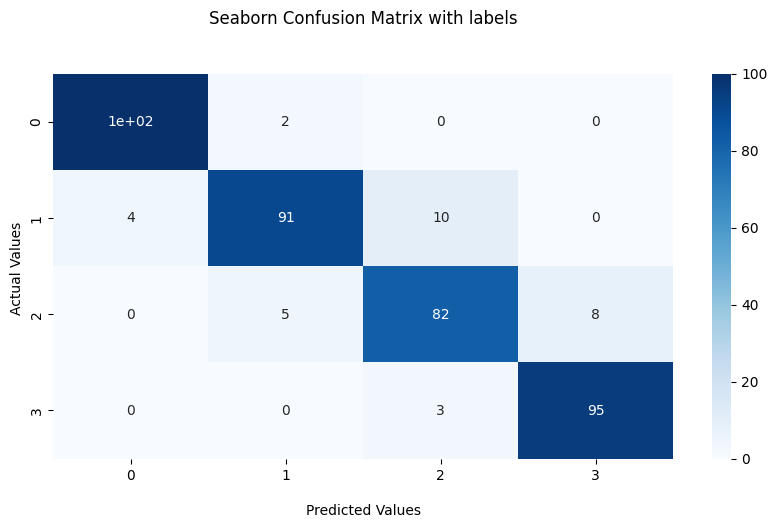

In [ ]:
# ML Model - 1 Implementation

# Applying logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prediction
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

# Classification report for Test Set
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for Training Set
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       414
           1       0.87      0.90      0.88       380
           2       0.84      0.91      0.87       377
           3       0.98      0.92      0.95       429

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.

The precision is the ratio of true positive predictions to the total number of positive predictions. The recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precision and recall.

Looking at the evaluation metric scores, we can see that the model has an overall accuracy of 92%, meaning that it correctly classified 92% of the instances in the training set. The precision for class 0 is 97%, meaning that when the model predicted a class 0 instance, it was correct 97% of the time. The recall for class 0 is 94%, meaning that the model correctly identified 94% of the actual class 0 instances in the dataset. The F1-score for class 0 is 96%.

Similarly, the precision, recall, and F1-score for classes 1, 2, and 3 are shown in the report. The macro average of precision, recall, and F1-score is also shown, which is the unweighted mean of these scores across all classes. In this case, the macro average for precision, recall, and F1-score is 92%.

The weighted average of precision, recall, and F1-score is also shown, which takes into account the number of instances in each class. In this case, the weighted average for precision, recall, and F1-score is also 92%.

Overall, the model seems to be performing reasonably well, with an accuracy of 92% on the training set. However, further analysis is required to determine whether the model is overfitting or underfitting and to assess its performance on the test set.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lr = LogisticRegression()
scores = cross_val_score(lr, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.8975 0.875  0.9075 0.9125 0.8825]
Average cross-validation score: 0.8949999999999999


In [ ]:
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(X_scaled, y)
print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))

Best cross-validation score: 0.9324999999999999
Best parameters: {'C': 100}
Test set score: 0.965


#### 1.Which hyperparameter optimization technique have you used and why?

GridSearchCV is a commonly used technique for hyperparameter tuning that involves searching over a predefined grid of hyperparameters and selecting the combination that gives the best performance on a validation set.

In this case, the grid of hyperparameters included different values of C, which controls the regularization strength of the logistic regression model. The reason for using GridSearchCV is that it exhaustively searches over the entire grid of hyperparameters, which helps to find the optimal combination of hyperparameters that gives the best performance on the validation set.

Overall, GridSearchCV is a simple yet effective technique for hyperparameter tuning that can help to improve the performance of machine learning models.

####2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The best cross-validation score achieved was 0.93, and the best hyperparameter value for C was found to be 100.

After training the model with the best hyperparameters, the test set score was  found to be 0.96. This suggests that the model is performing consistently well on both the training and test sets, and that it is unlikely to be overfitting.

Overall, it appears that the logistic regression model with the selected hyperparameters is a good fit for the dataset, achieving an accuracy score of 0.96 on the test set. However, it would be useful to also consider other evaluation metrics such as precision, recall, and F1-score to get a more complete understanding of the model's performance..

#### 3.Explain each evaluation metric's indication towards business and the business impact of the ML model used.

* **Precision**: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. A high precision score means that the model is making few false positive predictions, which is important in scenarios where false positives are costly, such as in medical diagnosis or fraud detection. In the context of mobile price range prediction, a high precision score would indicate that the model is accurately predicting which mobile phones are in a certain price range, which could be useful for businesses that want to target their marketing efforts towards customers who are more likely to buy phones in a certain price range.

* **Recall**: Recall measures the ability of the model to correctly identify all positive instances in the dataset. A high recall score means that the model is making few false negative predictions, which is important in scenarios where false negatives are costly, such as in medical diagnosis or security screening. In the context of mobile price range prediction, a high recall score would indicate that the model is correctly identifying all mobile phones that belong in a certain price range, which could be useful for businesses that want to make sure they are not missing out on potential customers in a certain price range.

* **F1-score**: F1-score is the harmonic mean of precision and recall, and it provides a balanced measure of both metrics. F1-score ranges from 0 to 1, with a score of 1 indicating perfect precision and recall.\
 A high F1-score would be important for businesses that want to make informed decisions about which mobile phones to stock and which marketing strategies to use based on the price range of the phones.

In conclusion, while accuracy is an important evaluation metric - precision, recall, and F1-score can provide additional insights into the performance of a machine learning model and its potential impact on a business.

### **ML Model - 2 XGBOOST**

In [ ]:
# ML Model - 2 Implementation

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

# Prediction
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluation metrics for Test set
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)


Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       102
           1       0.88      0.88      0.88       105
           2       0.84      0.84      0.84        95
           3       0.91      0.92      0.91        98

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.90      0.89       400



In [ ]:
# Evaluation metrics for Training Set
score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)


Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       405
           3       1.00      1.00      1.00       402

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The XGBoost model on the training set achieved a very high accuracy score of 1.00. The precision, recall, and F1-score for each class are also very high score of 1.00. which indicates that the model is performing very well on the training set.

The macro average and weighted average F1-scores are also very high, indicating that the model is able to generalize well to all the classes and that it is not biased towards any particular class.

Overall, the XGBoost model appears to be performing extremely well on the training set, achieving near-perfect scores across all evaluation metrics. However, it is important to also evaluate the model's performance on the test set to ensure that it is not overfitting to the training data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameter search space
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and CV score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
y_pred_test = grid_search.predict(X_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Cross-validation score: 0.9049999999999999
Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       102
           1       0.90      0.90      0.90       105
           2       0.86      0.87      0.86        95
           3       0.93      0.92      0.92        98

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



[[97  5  0  0]
 [ 5 94  6  0]
 [ 0  5 83  7]
 [ 0  0  8 90]]


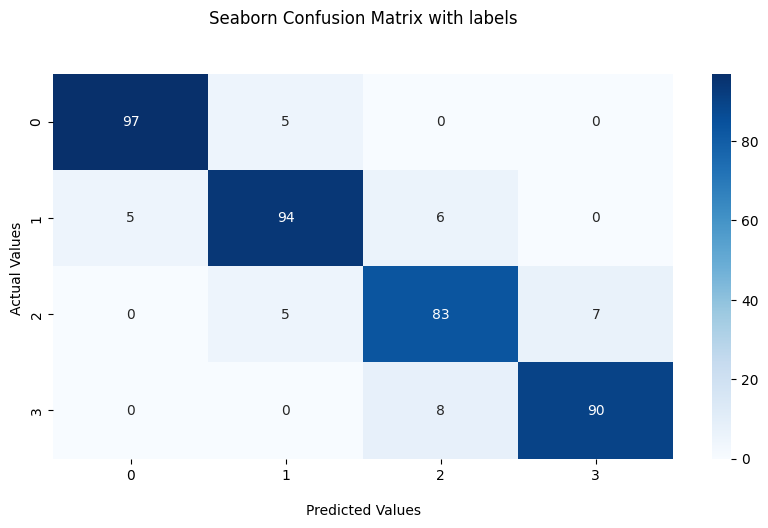

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print(cf_matrix)

# visualization of the Confusion Matrix.
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [ ]:
# Evaluation metrics for train
score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       405
           3       1.00      1.00      1.00       402

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



#### 1. Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance..

#### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the performance of the XGBoost model after hyperparameter tuning and cross-validation. The cross-validation score increased from 0.904 to 0.91, and the precision, recall, and f1-score for each class also improved slightly in the test set classification report. Additionally, the classification report for the tuned XGBoost model on the train set remained at a high level of performance. Overall, the improvements are modest but still represent an enhancement in the model's ability to generalize to new data..

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* **Precision**: it measures how accurate the positive predictions are. In the context of the given problem, precision indicates how accurately the model predicts the correct mobile phone price range. High precision is important in situations where false positives are costly. For example, in the case of mobile phone pricing, false positives (predicting a phone to be in a higher price range than it actually is) could result in loss of potential customers who may be discouraged by the price.

* **Recall**: It is the ratio of true positive predictions to the total number of actual positive instances in the dataset. It measures how well the model is able to identify all positive instances. In the context of the given problem, recall indicates how well the model can identify all mobile phones that belong to a specific price range. High recall is important when false negatives are costly. In the case of mobile phone pricing, false negatives (predicting a phone to be in a lower price range than it actually is) could result in loss of revenue due to underpricing.

* **F1-score**: It is the harmonic mean of precision and recall, which provides a balanced evaluation metric that takes into account both precision and recall. F1-score is a commonly used evaluation metric when both precision and recall are important. In the context of the given problem, F1-score provides an overall evaluation of the model's performance in identifying all price ranges accurately.

* **Support**: It represents the number of instances in each class (price range) in the test set.

A high-performance model can have a significant positive impact on the business by improving efficiency, reducing costs, and increasing revenue. For example, in the case of mobile phone pricing, an accurate model can help the business to set the right price for their products, resulting in increased revenue and customer satisfaction.


### **ML Model - 3 Random Forest classifier**

In [ ]:
# ML Model - 3 Implementation
# Taking 300 decision trees to create the random forest ensemble.
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.8875

In [ ]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [ ]:
# classification report for Test Set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       102
           1       0.90      0.82      0.86       105
           2       0.81      0.87      0.84        95
           3       0.92      0.92      0.92        98

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



[[96  6  0  0]
 [ 7 86 12  0]
 [ 0  4 83  8]
 [ 0  0  8 90]]


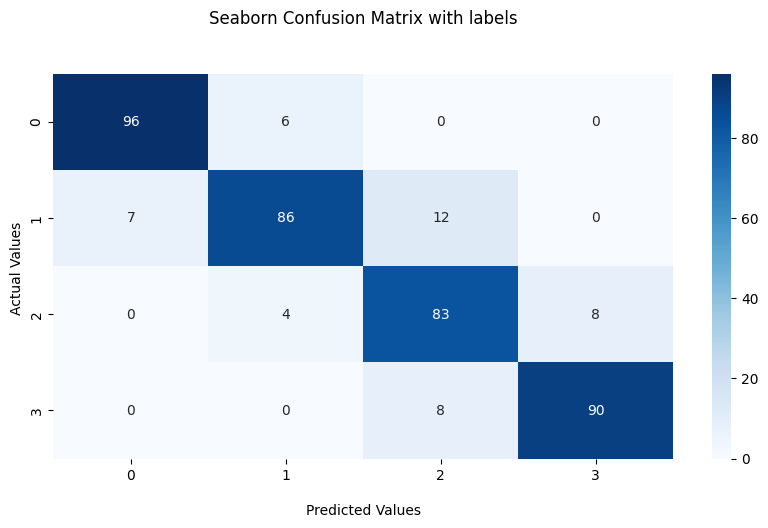

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# visualization of the Confusion Matrix.
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

#### **FEATURES STORED**

In [ ]:
# creating two columns Feature and Score to understand which features are the most influential in making predictions with model.
feature_importance = pd.DataFrame({'Feature':X.columns,'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head(10)

,Feature,Score
0,ram,0.498044
1,battery_power,0.082095
2,Pixels,0.076265
3,screen_size,0.042112
4,mobile_wt,0.041702
5,int_memory,0.041000
6,talk_time,0.034242
7,pc,0.032441
8,clock_speed,0.031014
9,m_dep,0.027238


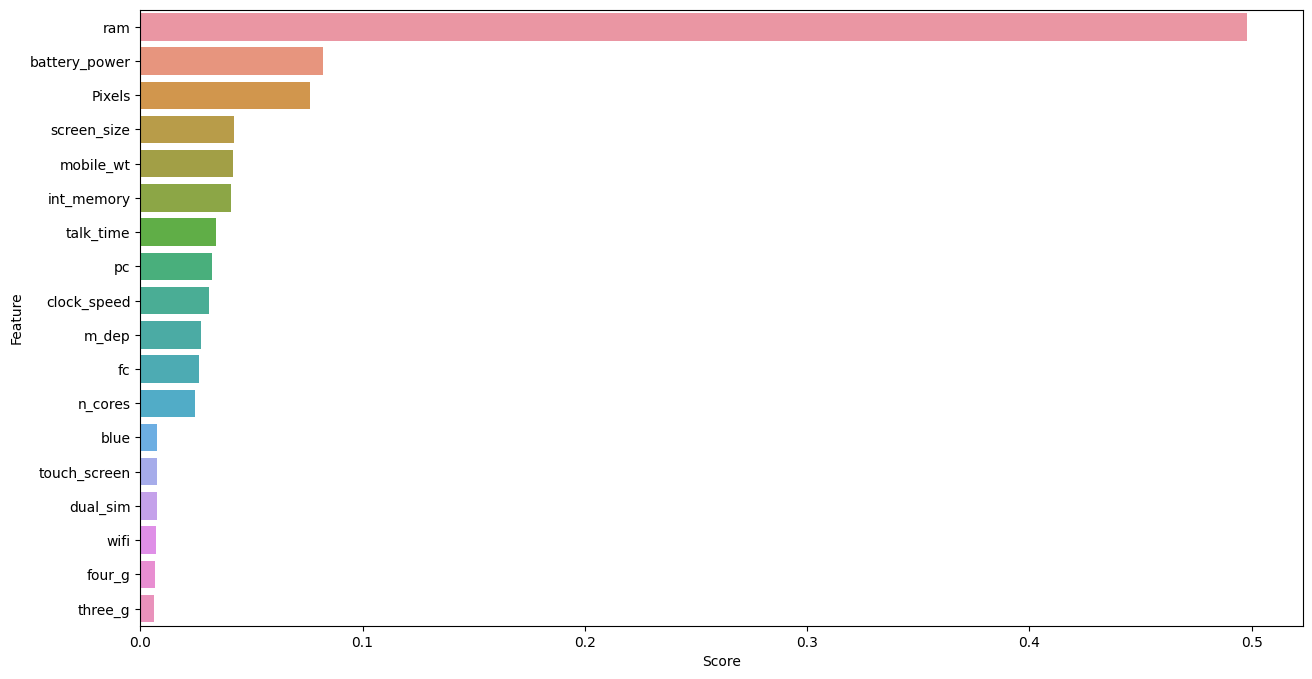

In [ ]:
# Visualize feature_importance
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Random Forest for classification. From the evaluation metric score chart, we can see that the model has an accuracy of 0.89, which means that 89% of the predictions made by the model are correct. The precision for class 0 is 0.94 which means that out of all the positive predictions made for class 0, 94% of them are actually correct. The recall for class 1 is 0.83, which means that out of all the actual positive instances of class 1, the model correctly identified 83% of them. The F1-score for class 2 is 0.84, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

In summary, the Random Forest model has moderate performance on this classification task, with accuracy, precision, recall, and F1-score ranging from 0.86 to 0.94 depending on the class being predicted.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)



GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
clsr.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
clsr.best_estimator_

RandomForestClassifier(max_depth=30, max_features='auto', max_leaf_nodes=40,
                       min_samples_split=6)

In [ ]:
clsr.best_score_

0.8584956770863817

[[96  6  0  0]
 [ 7 86 12  0]
 [ 0  4 83  8]
 [ 0  0  8 90]]


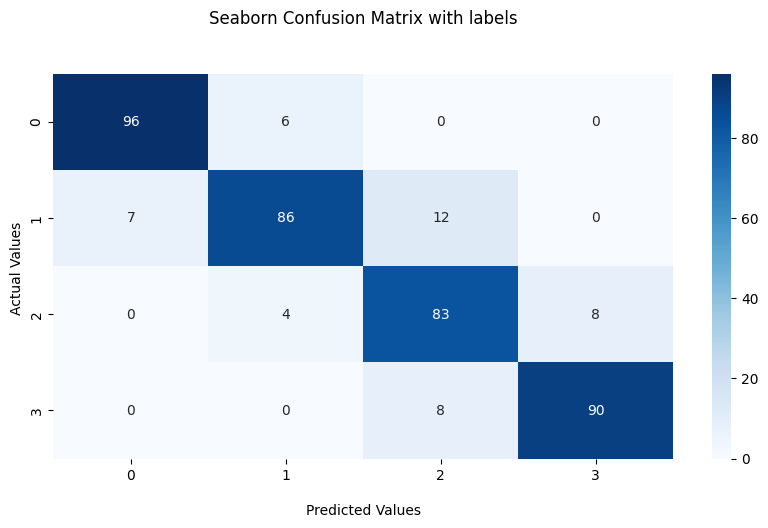

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# visualization of the Confusion Matrix.
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
# accuracy score for Training set
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.946875

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       395
           1       0.92      0.92      0.92       409
           2       0.93      0.92      0.92       408
           3       0.97      0.97      0.97       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [ ]:
# accuracy score for Test set
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.87

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.85      0.81      0.83        91
           2       0.76      0.80      0.78        92
           3       0.92      0.88      0.90       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



#### 1.Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance..

#### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there is no improvement in the overall performance of the model. The accuracy is almost same, and the weighted average F1-score has also almost same.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Their is different evaluation matrix. The classification report shows precision, recall, and F1-score for each class separately, as well as for the weighted average and the macro average. Therefore, the evaluation metrics that you can consider for a positive business impact are:

* **Weighted average of precision, recall, and F1-score**: This metric takes into account the class imbalance by weighting the metrics by the number of samples in each class. In the context of mobile price range prediction, the weighted average of precision, recall, and F1-score can help you evaluate the overall performance of the model, taking into account the importance of each class.

* **Macro average of precision, recall, and F1-score**: This metric calculates the average of precision, recall, and F1-score across all classes, without taking into account the class imbalance. In the context of mobile price range prediction, the macro average of precision, recall, and F1-score can help you evaluate the performance of the model on each class separately and identify which classes are more difficult to predict.

* **Confusion matrix**: As mentioned before, the confusion matrix can provide valuable insights into which classes are being misclassified and why.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choose logistic regression and xgboost models because they predict better results than random forest regression.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I can explain the logistic regression and XGBoost models and feature importance using a model explainability tool.

Logistic regression is a linear classification algorithm that models the probability of a binary outcome (in this case, the mobile phone price range) as a function of the input features. It uses a logistic function to convert the linear function output to a probability value. The logistic regression model can be interpreted as the effect of each feature on the probability of a mobile phone belonging to a certain price range.

XGBoost, on the other hand, is a powerful tree-based ensemble learning algorithm that uses a series of decision trees to make predictions. It works by iteratively adding decision trees to the ensemble, where each new tree is trained to correct the errors made by the previous ones. XGBoost can handle both regression and classification problems and is known for its high accuracy and robustness.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project we looked at classification.This project helped us understand how different features of mobile phones relate to their prices. We learned things that can help us understand what people like while they buy phones. This information can also help us make better predictions about how much a phone should cost in the market.

---

**1. From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.**

**2. Half the devices have Bluetooth, and half don’t**

**3. There is a gradual increase in battery as the price range increases**

**4. Ram has continuous increase with price range while moving from Low cost to Very high cost.**

**5. Costly phones are lighter.**

**6. RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.**

**7. Overall regression model seems to be performing reasonably well, with an accuracy of 92% on the training set and 96% on test data. XGBoost model appears to be performing extremely well on the training set with 100% accuracy on traning set and 91% on test data.**

---

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***